In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
dfm = pd.read_csv('movies.csv')

In [14]:
dfm.shape

(9742, 3)

In [15]:
dfr = pd.read_csv('ratings.csv')

In [16]:
dfr.shape

(100836, 4)

In [17]:
len(set(dfr['userId'].tolist()))

610

In [20]:
dfm.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [21]:
dfr.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [29]:
dfm.merge(dfr,on='movieId').groupby(['movieId','title'])['rating'].count()

movieId  title                                    
1        Toy Story (1995)                             215
2        Jumanji (1995)                               110
3        Grumpier Old Men (1995)                       52
4        Waiting to Exhale (1995)                       7
5        Father of the Bride Part II (1995)            49
                                                     ... 
193581   Black Butler: Book of the Atlantic (2017)      1
193583   No Game No Life: Zero (2017)                   1
193585   Flint (2017)                                   1
193587   Bungo Stray Dogs: Dead Apple (2018)            1
193609   Andrew Dice Clay: Dice Rules (1991)            1
Name: rating, Length: 9724, dtype: int64

In [42]:
asit = dfr.groupby('movieId')['rating'].count()

In [73]:
asit.sort_values(ascending=False)

movieId
356       329
318       317
296       307
593       279
2571      278
         ... 
4093        1
4089        1
58351       1
4083        1
193609      1
Name: rating, Length: 9724, dtype: int64

In [74]:
dfm.set_index('movieId').loc[356]

title          Forrest Gump (1994)
genres    Comedy|Drama|Romance|War
Name: 356, dtype: object

In [47]:
dfm.reset_index()

,index,movieId,title,genres
0,0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,2,Jumanji (1995),Adventure|Children|Fantasy
2,2,3,Grumpier Old Men (1995),Comedy|Romance
3,3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...,...
9737,9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,9739,193585,Flint (2017),Drama
9740,9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [48]:
dft = pd.read_csv('tags.csv')

In [49]:
dft.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [52]:
dfm.set_index('title').loc["Matrix, The (1999)"]

movieId                      2571
genres     Action|Sci-Fi|Thriller
Name: Matrix, The (1999), dtype: object

In [54]:
dft.set_index('movieId').loc[2571]

,userId,tag,timestamp
movieId,,,
2571,424,martial arts,1457842912
2571,424,sci-fi,1457842899
2571,474,alternate universe,1137204991
2571,537,philosophy,1424141098
2571,537,post apocalyptic,1424141101


In [57]:
dfm.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [58]:
dfr.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [68]:
dfm.set_index('title').loc['Terminator 2: Judgment Day (1991)']

movieId              589
genres     Action|Sci-Fi
Name: Terminator 2: Judgment Day (1991), dtype: object

In [78]:
dfr[dfr['movieId']==589]['rating'].mean()

3.970982142857143

In [101]:
dfm[dfm['title']=='Fight Club (1999)']['movieId']

2226    2959
Name: movieId, dtype: int64

<Axes: ylabel='Density'>

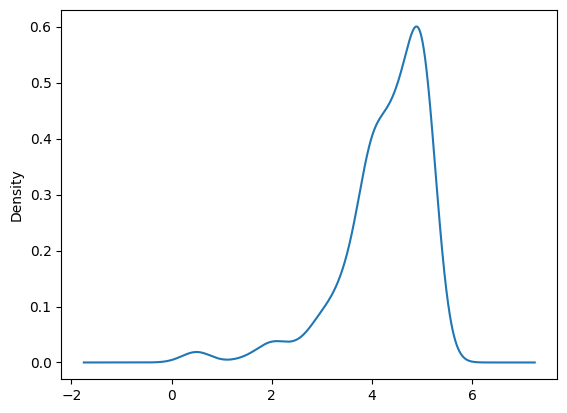

In [97]:
dfr[dfr['movieId']==2959]['rating'].plot(kind='kde')

In [147]:
file = dfr.groupby('movieId').agg({'rating':['count','mean']}).reset_index()

In [155]:
newfile = pd.merge(dfm,file,on='movieId')

C:\Users\amrit\AppData\Local\Temp\ipykernel_19272\1102774205.py:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  newfile = pd.merge(dfm,file,on='movieId')
C:\Users\amrit\AppData\Local\Temp\ipykernel_19272\1102774205.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  newfile = pd.merge(dfm,file,on='movieId')


In [158]:
newfile.columns=['movieId','title','genres','count','mean']

In [161]:
newfile[newfile['count']>50].sort_values(by= 'mean',ascending=False).iloc[0]

movieId                                 318
title      Shawshank Redemption, The (1994)
genres                          Crime|Drama
count                                   317
mean                               4.429022
Name: 277, dtype: object

In [162]:
newfile[newfile['count']>50].sort_values(by= 'count',ascending=False).iloc[0:5]

,movieId,title,genres,count,mean
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446


In [170]:
newdata = newfile[newfile['count']>50]

In [179]:
newdata[newdata['genres'].str.contains('Sci-Fi')].sort_values(by='count',ascending=False).iloc[2]

movieId                                 480
title                  Jurassic Park (1993)
genres     Action|Adventure|Sci-Fi|Thriller
count                                   238
mean                                   3.75
Name: 418, dtype: object

In [183]:
dfl = pd.read_csv('links.csv')

In [185]:
dfl

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [186]:
import requests
import numpy as np
from bs4 import BeautifulSoup

In [187]:
def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text)
    imdb_rating = soup.find('span', attrs={'class' : 'sc-bde20123-1 cMEQkK'})
    return imdb_rating.text if imdb_rating else np.nan

In [196]:
imdb = pd.merge(newdata,dfl,on='movieId')

In [199]:
imdb['imdbRatings'] = imdb['imdbId'].apply(scrapper)

In [200]:
imdb

,movieId,title,genres,count,mean,imdbId,tmdbId,imdbRatings
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,862.0,8.3
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,8844.0,7.1
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,15602.0,6.6
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277,949.0,8.3
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,11860.0,6.3
...,...,...,...,...,...,...,...,...
431,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667,993846,106646.0,8.2
432,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846,2278388,120467.0,8.1
433,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151,816692,157336.0,8.7
434,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847,2015381,118340.0,8.0


In [205]:
imdb[imdb['imdbRatings']==imdb['imdbRatings'].max()]

,movieId,title,genres,count,mean,imdbId,tmdbId,imdbRatings
53,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022,111161,278.0,9.3


In [207]:
imdbSci_fi = imdb[imdb['genres'].str.contains('Sci-Fi')]

In [208]:
imdbSci_fi[imdbSci_fi['imdbRatings']==imdbSci_fi['imdbRatings'].max()]

,movieId,title,genres,count,mean,imdbId,tmdbId,imdbRatings
424,79132,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,143,4.066434,1375666,27205.0,8.8


In [212]:
imdbSci_fi

,movieId,title,genres,count,mean,imdbId,tmdbId,imdbRatings
12,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,177,3.983051,114746,63.0,8.0
30,160,Congo (1995),Action|Adventure|Mystery|Sci-Fi,57,2.877193,112715,10329.0,5.3
35,172,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,53,2.679245,113481,9886.0,5.6
36,173,Judge Dredd (1995),Action|Crime|Sci-Fi,62,2.669355,113492,9482.0,5.6
38,208,Waterworld (1995),Action|Adventure|Sci-Fi,115,2.913043,114898,9804.0,6.3
...,...,...,...,...,...,...,...,...
427,89745,"Avengers, The (2012)",Action|Adventure|Sci-Fi|IMAX,69,3.869565,848228,24428.0,8.0
428,91500,The Hunger Games (2012),Action|Adventure|Drama|Sci-Fi|Thriller,54,3.435185,1392170,70160.0,7.2
433,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151,816692,157336.0,8.7
434,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847,2015381,118340.0,8.0
